# ImpDAR Python-Matlab Time Offset Tutorial

## Introduction

https://stackoverflow.com/questions/13965740/converting-matlabs-datenum-format-to-python

In [15]:
# We get annoying warnings about backends that are safe to ignore
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from scipy.io import loadmat
from scipy.io import savemat

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import os

from mpl_toolkits.basemap import Basemap

import impdar
from impdar.lib import load
from impdar.lib import plot
from impdar.lib import gpslib

## Loading Data, Basic Processing

In [16]:
#files on disk, with file names to save to
herc_file = './data/HDGridE_x53_raw.mat'
herc_out_file = './data/HDGridE_x53_cropped_nmo_bandpassed_mod.mat'

gps_in_file = './data/HD_precisionGPS_2018_Day3.mat'
gps_out_file = './data/HD_precisionGPS_2018_Day3_mod.mat'

#load herc dome data, cropped and bandpassed
dat = load.load('mat', herc_file)[0]

#then crop, apply nmo correction, vertically bandpass
dat.crop(lim=0, top_or_bottom='top', dimension='pretrig')
dat.nmo(ant_sep=171.4)
dat.vertical_band_pass(low=1, high=5)

#load precision gps data
prec_gps = loadmat(gps_in_file)
prec_gps['year'] = prec_gps['gpsdata'][:, 0]
prec_gps['day'] = prec_gps['gpsdata'][:, 1]
prec_gps['s'] = prec_gps['gpsdata'][:, 2]
prec_gps['lat'] = prec_gps['gpsdata'][:, 3]
prec_gps['long'] = prec_gps['gpsdata'][:, 4]
prec_gps['elev'] = prec_gps['gpsdata'][:, 5]
prec_gps['decday'] = prec_gps['gpsdata'][:, 13]

Vertical samples reduced to subset [128:8320] of original
Bandpassing from  1.0 to  5.0 MHz...
Bandpass filter complete.


## Inpsect the data

In [17]:
for k, v in vars(dat).items():
    print('\'{}\':'.format(k), v)

'chan': 2
'data': [[-4.34390017e+03 -4.30807805e+03 -4.25361125e+03 ... -2.54144962e+03
  -2.83480267e+03 -1.92537598e+03]
 [-4.22646158e+03 -4.19387435e+03 -4.13716128e+03 ... -2.41046386e+03
  -2.71286881e+03 -1.74845536e+03]
 [-4.10131753e+03 -4.07203076e+03 -4.01355180e+03 ... -2.26818262e+03
  -2.57938523e+03 -1.56115175e+03]
 ...
 [-2.55123215e+00 -2.80371681e+00 -2.03269353e+00 ... -1.26900380e+00
  -1.39325259e+00  1.24042914e+00]
 [-2.24926475e+00 -2.67737071e+00 -1.81917385e+00 ... -1.21043309e+00
  -1.33424378e+00  1.17491706e+00]
 [-1.95599885e+00 -2.52420878e+00 -1.60561967e+00 ... -1.13881152e+00
  -1.26276198e+00  1.09805257e+00]]
'decday': [737454.07123351 737454.07126144 737454.07128971 ... 737454.10798595
 737454.10801412 737454.10804241]
'dt': 5e-09
'lat': [-86.44215833 -86.44216167 -86.44215833 ... -86.413815   -86.413795
 -86.41375167]
'long': [-107.063385   -107.06336667 -107.06335    ... -108.23179    -108.23268833
 -108.23448667]
'pressure': [0 0 0 ... 0 0 0]
's

In [18]:
print(prec_gps.keys())

dict_keys(['__header__', '__version__', '__globals__', 'gpsdata', 'year', 'day', 's', 'lat', 'long', 'elev', 'decday'])


In [19]:
#print(prec_gps['gpsdata'][:, 13])
print(prec_gps['decday'])

[29.01945602 29.0194676  29.01947917 ... 29.18770834 29.18771991
 29.18773148]


In [20]:
print(dat.decday[:5])
#look at orginal variable here;
#so we need to somehow combine the ordinal and the 14th column of prec_gps['gpsdata']

[737454.07123351 737454.07126144 737454.07128971 737454.07131745
 737454.07134556]


### First, let's fix the precision gps's decday variable to correct for the Matlab offset.

In [21]:
print(date.toordinal(date(2019, 1, 29)))

737088


In [22]:
print(737454 - 737088)

366


In [23]:
print(date.fromordinal(737454 - 366))

2019-01-29


In [24]:
dat.decday -= 366

In [25]:
print(dat.decday[:5])

[737088.07123351 737088.07126144 737088.07128971 737088.07131745
 737088.07134556]


In [26]:
print(dat.elev)

[2637.89990234 2637.39990234 2636.80004883 ... 2632.69995117 2632.39990234
 2632.80004883]


In [27]:
print('Year:   ', prec_gps['gpsdata'][:, 0])
print('Day:    ', prec_gps['gpsdata'][:, 1])
print('Seconds:', prec_gps['gpsdata'][:, 2][:4])
print('Latitude:', prec_gps['gpsdata'][:, 3][:4])
print('Longitude:', prec_gps['gpsdata'][:, 4][:4])
print('Elev:', prec_gps['gpsdata'][:, 5][:4])
print('?:', prec_gps['gpsdata'][:, 6][:4])
print('?:', prec_gps['gpsdata'][:, 7][:4])
print('?:', prec_gps['gpsdata'][:, 8][:4])
print('?:', prec_gps['gpsdata'][:, 9][:4])
print('?:', prec_gps['gpsdata'][:, 10][:4])
print('?:', prec_gps['gpsdata'][:, 11][:4])
print('?:', prec_gps['gpsdata'][:, 12][:4])
print('Decday:', prec_gps['gpsdata'][:, 13][:4])
print('?:', prec_gps['gpsdata'][:, 14][:4])

Year:    [2019. 2019. 2019. ... 2019. 2019. 2019.]
Day:     [29. 29. 29. ... 29. 29. 29.]
Seconds: [1681.000384 1682.000385 1683.000385 1684.000385]
Latitude: [-86.41386905 -86.41386904 -86.41386903 -86.41386901]
Longitude: [252.47770121 252.47770121 252.47770097 252.47770084]
Elev: [2600.6025 2600.5945 2600.5981 2600.5962]
?: [1.3 1.3 1.3 1.3]
?: [1.1 1.1 1.1 1.1]
?: [5.4 5.4 5.4 5.3]
?: [0.  1.2 1.8 2.9]
?: [10. 10. 10. 10.]
?: [1628.18 1628.18 1628.19 1628.2 ]
?: [4.8  4.7  4.61 4.53]
Decday: [29.01945602 29.0194676  29.01947917 29.01949075]
?: [1. 2. 3. 4.]


In [28]:
print(dat.long)
print(dat.lat)

[-107.063385   -107.06336667 -107.06335    ... -108.23179    -108.23268833
 -108.23448667]
[-86.44215833 -86.44216167 -86.44215833 ... -86.413815   -86.413795
 -86.41375167]


In [29]:
print(np.unique(prec_gps['gpsdata'][:, 1]))

[29.]


At this point, I should subtract 366 from the herc file to get the correct day of 2019-01-29.

From Ben:
    
The GPS file is: Year, Day, Seconds, Latitude, Longitude, Elevation
The remaining columns are unnecessary. Although you could use column 14 which is decimal day of year.

In [30]:
print(prec_gps['decday'])

[29.01945602 29.0194676  29.01947917 ... 29.18770834 29.18771991
 29.18773148]


In [31]:
prec_gps['decday'] -= 29
prec_gps['decday'] += 737088

In [32]:
print(prec_gps['decday'])

[737088.01945602 737088.0194676  737088.01947917 ... 737088.18770834
 737088.18771991 737088.18773148]


### Now let's look at the radar data.

In [33]:
#add x and y coordinates here
#m = Basemap(projection='stere', llcrnrlon=225, llcrnrlat=-41.45, urcrnrlon=42.24, urcrnrlat=-39.23, 
#           lon_0=180, lat_0=-90)

m = Basemap(projection='spstere', lon_0=180, boundinglat=-80)
x, y = m(dat.long, dat.lat)

#we are reconverting the long and lat variables because they are
#not using the same projection as we are
#this will not affect the results that we have
px, py = m(prec_gps['long'], prec_gps['lat'])

/home/jakidxav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


In [34]:
dat.x = x
dat.y = y
prec_gps['x_coord'] = px
prec_gps['y_coord'] = py

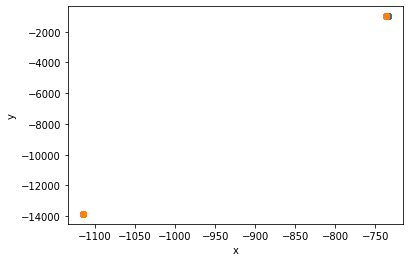

In [35]:
#%matplotlib notebook
plt.scatter(px/1000, py/1000)
plt.scatter(dat.x/1000, dat.y/1000)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
#remove the singleton dimension
herc_lat = np.squeeze(dat.lat)
herc_lon = np.squeeze(dat.long)

gps_lat = np.squeeze(prec_gps['lat'])
gps_lon = np.squeeze(prec_gps['long'])

In [37]:
prec_gps['lat'] = gps_lat
prec_gps['long'] = gps_lon

In [38]:
herc_lon += 360

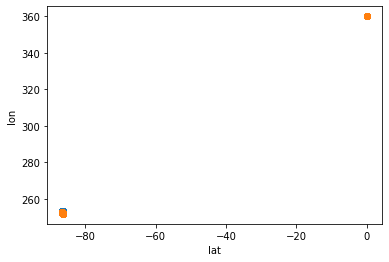

In [39]:
plt.scatter(gps_lat, gps_lon)
plt.scatter(herc_lat, herc_lon)
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

In [40]:
print(np.where(herc_lon>280)[0])

[105 106 107 108 109 110 111 112 113 114 115]


In [41]:
keep_points = np.where(herc_lon<280)[0]
herc_lat = herc_lat[keep_points]
herc_lon = herc_lon[keep_points]

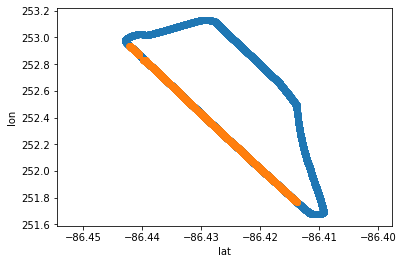

In [42]:
#%matplotlib notebook
plt.scatter(gps_lat, gps_lon)
plt.scatter(herc_lat, herc_lon)
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

In [43]:
prec_gps['px'] = px
prec_gps['py'] = py

dat.decday = dat.decday[keep_points]

dat.lat = herc_lat
dat.long = herc_lon

In [44]:
x2, y2 = m(dat.long, dat.lat)

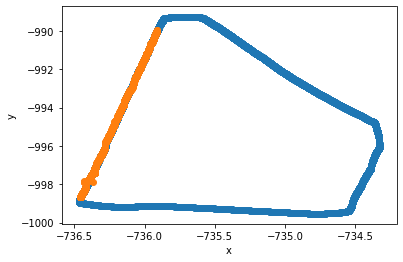

In [45]:
#%matplotlib notebook
plt.scatter(px/1000, py/1000)
plt.scatter(x2/1000, y2/1000)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
dat.x_coord = x2
dat.y_coord = y2

In [47]:
dat.dist

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [48]:
dat.dist = np.hstack(([0], np.cumsum(np.sqrt(np.diff(x) ** 2.0 + np.diff(y) ** 2.0))))
dat.dist

array([0.00000000e+00, 3.92021567e-01, 7.80477534e-01, ...,
       2.57372333e+07, 2.57372400e+07, 2.57372534e+07])

In [49]:
prec_gps.keys()

dict_keys(['__header__', '__version__', '__globals__', 'gpsdata', 'year', 'day', 's', 'lat', 'long', 'elev', 'decday', 'x_coord', 'y_coord', 'px', 'py'])

In [50]:
dat.save(herc_out_file)
savemat(gps_out_file, prec_gps)

In [51]:
for k, v in vars(dat).items():
    print('\'{}\':'.format(k), v)

'chan': 2
'data': [[-4.34390017e+03 -4.30807805e+03 -4.25361125e+03 ... -2.54144962e+03
  -2.83480267e+03 -1.92537598e+03]
 [-4.22646158e+03 -4.19387435e+03 -4.13716128e+03 ... -2.41046386e+03
  -2.71286881e+03 -1.74845536e+03]
 [-4.10131753e+03 -4.07203076e+03 -4.01355180e+03 ... -2.26818262e+03
  -2.57938523e+03 -1.56115175e+03]
 ...
 [-2.55123215e+00 -2.80371681e+00 -2.03269353e+00 ... -1.26900380e+00
  -1.39325259e+00  1.24042914e+00]
 [-2.24926475e+00 -2.67737071e+00 -1.81917385e+00 ... -1.21043309e+00
  -1.33424378e+00  1.17491706e+00]
 [-1.95599885e+00 -2.52420878e+00 -1.60561967e+00 ... -1.13881152e+00
  -1.26276198e+00  1.09805257e+00]]
'decday': [737088.07123351 737088.07126144 737088.07128971 ... 737088.10798595
 737088.10801412 737088.10804241]
'dt': 5e-09
'lat': [-86.44215833 -86.44216167 -86.44215833 ... -86.413815   -86.413795
 -86.41375167]
'long': [252.936615   252.93663333 252.93665    ... 251.76821    251.76731167
 251.76551333]
'pressure': [0 0 0 ... 0 0 0]
'snum': 

In [52]:
prec_gps2 = loadmat(gps_out_file)

In [53]:
prec_gps2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'gpsdata', 'year', 'day', 's', 'lat', 'long', 'elev', 'decday', 'x_coord', 'y_coord', 'px', 'py'])